<h1 style="text-align:center;font-size:40px;"> Predict The News Category Hackathon </h1>

![Robot reading paper](https://www.machinehack.com/wp-content/uploads/2019/07/robot-reading-paper-3.jpg")

**This hackathon was hosted by www.machinehack.com.**

<h2> Competition details : </h2>

From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this hackathon, we have to predict which genre or category a piece of news will fall in to from the story.

* **Size of training set :** 7,628 records
* **Size of test set :** 2,748 records

<h2> Data Features :</h2>

**STORY :**  A part of the main content of the article to be published as a piece of news.

**SECTION :** The genre/category the STORY falls in. There are four distinct sections where each story may fall in to. 

The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

<h2> 1. Data loading </h2>

In [0]:
import pandas as pd   # For reading files & dataframe manipulations
import numpy as np    # For array based operations
import gc             # For garbage collection 

In [0]:
# Loading excel files
df = pd.read_excel("Data_Train.xlsx")
test_df = pd.read_excel("Data_Test.xlsx")

df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [0]:
print("Labelled dataset dims: ",df.shape)
print("Test dataset dims: ",test_df.shape)
df.info()

Labelled dataset dims:  (7628, 2)
Test dataset dims:  (2748, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
STORY      7628 non-null object
SECTION    7628 non-null int64
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [0]:
# Finding data distribution 
df["SECTION"].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

**Observation :** The dataset is more or less balanced.

<h2> 2. Splitting the data </h2>

In [0]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1, random_state=2019)
print(train_df.shape)
print(val_df.shape)

(6865, 2)
(763, 2)


<h2> 3. Data preprocessing </h2>

It involves : 

* Converting all characters to lower-case .
* Replacing words with their expanded form.
* Lemmatizing words to their root form.

In [0]:
# Importing libraries required for text preprocessing

import re    # Regex parsing
from nltk.stem import WordNetLemmatizer    # For stemming words

lemmatizer = WordNetLemmatizer()

# Utilities for text preprocessing
def txt_preprocess(x):
    
    x = str(x).lower()
    
    # Replacing unwanted texts
    x = x.replace("′", "'")
    x = x.replace("’", "'")
    x = x.replace("won't", "will not")
    x = x.replace("cannot", "can not")
    x = x.replace("can't", "can not")
    x = x.replace("n't", " not")
    x = x.replace("what's", "what is")
    x = x.replace("it's", "it is")
    x = x.replace("'ve", " have")
    x = x.replace("i'm", "i am")
    x = x.replace("'re", " are")
    x = x.replace("he's", "he is")
    x = x.replace("she's", "she is")
    x = x.replace("'s", " own")
    x = x.replace("%", " percent ")
    x = x.replace("'ll", " will")
    
    words = x.split(" ")    
    # Lemmatizing words,i.e , replace word with corresponding root word.
    words = [lemmatizer.lemmatize(word) for word in words]
    # Words containing only alphabets
    words = [word for word in words if word.isalpha()]
    # Joining the words back
    x = (" ").join(words)
    
    return x

In [0]:
## Text preprocessing
train_df["STORY"] = train_df["STORY"].fillna("_na_").apply(txt_preprocess)
val_df["STORY"] = val_df["STORY"].fillna("_na_").apply(txt_preprocess)
test_df["STORY"] = test_df["STORY"].fillna("_na_").apply(txt_preprocess)

train_df.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STORY,SECTION
5118,in the assembly the trs won only seat in but s...,0
3173,his post to announce my solo directional by an...,2
1561,actor ha of course seen the high and hit and m...,2


In [0]:
y_train = pd.get_dummies(train_df["SECTION"].values)
y_val = pd.get_dummies(val_df["SECTION"].values)

print(y_train.shape)
print(y_val.shape)

(6865, 4)
(763, 4)


<h2> 4) Data preparation </h2>

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

train_X = train_df["STORY"].values
val_X = val_df["STORY"].values
test_X = test_df["STORY"].values

maxlen = 70  
max_features = 25000  

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

Using TensorFlow backend.


In [0]:
# For getting word embeddings 
def get_coefs(word,*arr): 
     return word, np.asarray(arr, dtype='float32')

<h2> 4.1) Preparing embedding matrix </h2>

Embeddings generally represent geometrical encodings of words based on how frequently appear together in a text corpus. Various implementations of word embeddings described below differs in the way as how they are constructed. Multiple pretrained word-embeddings have been used here for a better word representation.

<h3>Step 1: Extracting GLoVe embeddings :</h3>

The main idea behind it is that you train a model on the context on each word, so similar words will have similar numerical representations.

GLoVE learns by constructing a co-occurrence matrix (words X context) that basically count how frequently a word appears in a context. Since it's going to be a gigantic matrix, we factorize this matrix to achieve a lower-dimension representation. There's a lot of details that goes in GLoVE but that's the rough idea.

<h3>Step 2: Extracting FastText embeddings :</h3>

FastText is quite different from GLoVE. While GLoVE treats each word as the smallest unit to train on, FastText uses n-gram characters as the smallest unit. For example, the word vector ,"apple", could be broken down into separate word vectors units as "ap","app","ple". The biggest benefit of using FastText is that it generate better word embeddings for rare words, or even words not seen during training because the n-gram character vectors are shared with other words. This is something that GLoVE cannot achieve

<h3>Step 3: Concatenating them to get (no.of unique tokens in dataset * 600) shaped matrix. </h3>

In [0]:
# Extracting GLoVe embeddings
EMBEDDING_FILE_1 = 'glove.840B.300d/glove.840B.300d.txt'
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE_1))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))  # Should be len(word_index)-1, indices start from 0.

# Creating the embedding matrix with GLoVE
embedding_matrix_1 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_1[i] = embedding_vector

del embeddings_index; gc.collect()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


102

In [0]:
embedding_matrix_1.shape

(23011, 300)

In [0]:
# Extracting FastText embeddings
EMBEDDING_FILE_2 = 'wiki-news-300d-1M/wiki-news-300d-1M.vec'
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE_2) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

# Creating the embedding matrix with wikinews embeddings
embedding_matrix_2 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_2[i] = embedding_vector
        
del embeddings_index; gc.collect() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


22

In [0]:
embedding_matrix = np.concatenate((embedding_matrix_1, embedding_matrix_2), axis=1)  

del embedding_matrix_1, embedding_matrix_2
gc.collect()

print("Shape of embedding matrix: ",np.shape(embedding_matrix))

Shape of embedding matrix:  (23011, 600)


<h2> 5) Training LSTMs </h2>

In [0]:
# Importing necessary libraries
from keras.layers import Dense, Input, CuDNNLSTM, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [0]:
# https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None
    
    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim    

<h2> Using Cyclical Learning Rates  </h2>

This technique is used to automatically get an optimal learning rate for our model. It was introduced by Leslie Smith in his paper Cyclical Learning Rates for Training Neural Networks (link :  https://arxiv.org/abs/1506.01186).

**Problems of basic learning-rate schedules :**

- We don’t know what the optimal initial learning rate is.
- Monotonically decreasing our learning rate may lead to our network getting “stuck” in plateaus of the loss landscape.

**Cyclical Learning Rates take a different approach. Using CLRs, we now :**

- Define a minimum learning rate
- Define a maximum learning rate
- Allow the learning rate to cyclically oscillate between the two bounds

![Cyclical Learning Rate image](https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_clr_triangular.png)

**Why use CLR ?**

- The first reason is that our network may become stuck in either saddle points or local minima, and the low learning rate may not be sufficient to break out of the area and descend into areas of the loss landscape with lower loss.

- Secondly, our model and optimizer may be very sensitive to our initial learning rate choice. If we make a poor initial choice in learning rate, our model may be stuck from the very start.

- Instead, we can use Cyclical Learning Rates to oscillate our learning rate between upper and lower bounds, enabling us to:
 -  Have more freedom in our initial learning rate choices.
 -  Break out of saddle points and local minima.

In practice, using Cyclical Learning Rates leads to faster convergence and with fewer experiments/hyperparameter updates.
I first came across this technique in FAST.AI's deep learning course (part-1). Check out that course : https://course.fast.ai/

You may also check this blog for the Keras implementation that I've used here: https://www.pyimagesearch.com/2019/07/29/cyclical-learning-rates-with-keras-and-deep-learning

In [0]:
# Setting parameters for CLR
min_lr = 1e-6
max_lr = 1e-2
batch_size = 64
step_size = 6
clr_method = "triangular2"
num_epochs = 30

In [0]:
spatial_dropout = 0.4
num_classes = 4

inp = Input(shape=(maxlen,))

x = Embedding(embedding_matrix.shape[0], embed_size*2, weights=[embedding_matrix])(inp)
x = SpatialDropout1D(spatial_dropout)(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])

x = Dense(num_classes, activation="softmax")(conc)
model = Model(inputs=inp, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 70)           0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 70, 600)      13806600    input_14[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_11 (SpatialDr (None, 70, 600)      0           embedding_13[0][0]               
__________________________________________________________________________________________________
bidirectional_11 (Bidirectional (None, 70, 256)      747520      spatial_dropout1d_11[0][0]       
__________________________________________________________________________________________________
global_ave

In [0]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [0]:
from clr_callback import CyclicLR

filepath="final_model.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=15)

# Creating instance of CyclicLR class & initializing it.
clr = CyclicLR(mode = clr_method,
              base_lr = min_lr,
              max_lr = max_lr,
              step_size = step_size*(train_X.shape[0] // batch_size))  # As suggested in the paper.

callbacks_list = [clr, checkpoint, early]

hist = model.fit(train_X, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(val_X, y_val),
          callbacks = callbacks_list,verbose=1)

Train on 6865 samples, validate on 763 samples
Epoch 1/30
6865/6865 [==============================] - 4s 586us/step - loss: 0.7008 - acc: 0.7142 - val_loss: 0.1770 - val_acc: 0.9332

Epoch 00001: val_acc improved from -inf to 0.93316, saving model to final_model.hdf5
Epoch 2/30
6865/6865 [==============================] - 3s 453us/step - loss: 0.1542 - acc: 0.9496 - val_loss: 0.0961 - val_acc: 0.9672

Epoch 00002: val_acc improved from 0.93316 to 0.96723, saving model to final_model.hdf5
Epoch 3/30
6865/6865 [==============================] - 3s 457us/step - loss: 0.0494 - acc: 0.9834 - val_loss: 0.1182 - val_acc: 0.9659

Epoch 00003: val_acc did not improve from 0.96723
Epoch 4/30
6865/6865 [==============================] - 3s 451us/step - loss: 0.0155 - acc: 0.9949 - val_loss: 0.1073 - val_acc: 0.9712

Epoch 00004: val_acc improved from 0.96723 to 0.97117, saving model to final_model.hdf5
Epoch 5/30
6865/6865 [==============================] - 3s 455us/step - loss: 0.0082 - acc: 0.

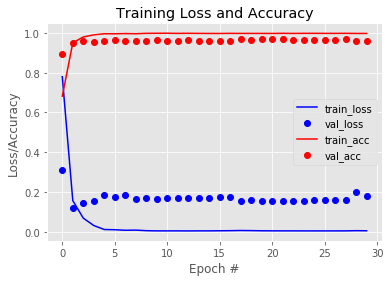

In [0]:
import matplotlib.pyplot as plt

N = np.arange(0, num_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], 'b', label="train_loss")
plt.plot(N, hist.history["val_loss"], 'bo', label="val_loss")
plt.plot(N, hist.history["acc"], 'r', label="train_acc")
plt.plot(N, hist.history["val_acc"], 'ro', label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

<h2> Plotting confusion matrix </h2>

In [0]:
# Importing necessary libraries 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y,num_classes):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    plt.figure(figsize=(7,3))
    
    labels = [i for i in range(num_classes)]
    
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

In [0]:
y_true = val_df["SECTION"].values
y_pred = model.predict(val_X)

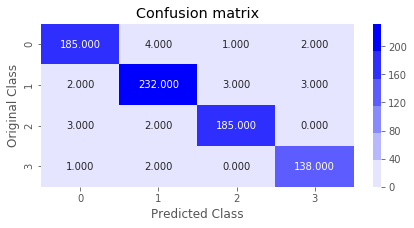

In [0]:
preds = []
for row in y_pred:
  preds.append(np.argmax(row))
  
preds = np.array(preds)
plot_confusion_matrix(y_true, preds, 4)

In [0]:
test_df.shape

(2748, 1)

In [0]:
y_test = model.predict([test_X], batch_size=1024, verbose=1)
y_test.shape

2748/2748 [==============================] - 0s 65us/step


(2748, 4)

In [0]:
preds = []
for row in y_test:
  preds.append(np.argmax(row))
  
y_test = np.array(preds)

In [0]:
sample_submission = pd.read_excel("Sample_submission.xlsx")
sample_submission["SECTION"] = y_test
sample_submission.to_excel('submission.xlsx', index=False)

<h2> Future experiments </h2>

- Use convolutional layers with LSTMs.
- Use pretrained models like GPT-2, BERT, XLNet